# 14장 트리

> 트리는 계층형 트리 구조를 시뮬레이션 하는 추상 자료형 (ADT)으로 루트 값과 부모-자식 관계의 서브트리로 구성되며, 서로 연결된 노드의 집합입니다.

트리 (Tree)는 하나의 뿌리에서 위로 뻗어 나가는 형상처럼 생겨서 'Tree' 라는 명칭이 붙었는데, 트리구조를 표현할 떄는 나무의 형상과는 반대 방향으로 표현합니다.

트리의 속성 중 하나는 재귀로 정의된 (Recursively Defined) 자기 참조 (Self-Referential) 자료구조라는 점입니다.

쉽게 말하면 트리는 자식도 트리고 또 그 자식도 트리입니다.

즉, 여러 개의 트리가 쌓아 올려져 큰 트리가 됩니다. 흔히 서브트리 (Subtress)로 구성됩니다.

### 트리의 각 명칭

트리는 항상 루트 Root 에서부터 시작됩니다.

루트는 자식 Child 노드를 가지며, 간선 Edge 으로 연결되어 있습니다.

자식 노드의 개수는 차수 Degree 라고 하며, 크기 Size 는 자신을 포함한 모든 자식 노드의 개수입니다.

높이 Height 는 현재 위치에서부터 리프 Leaf 까지의 거리, 깊이 Depth 는 루트에서부터 현재 노드까지의 거리이다.

트리는 그 자식도 트리인 서브 트리 Subtree 구성을 띤다고 앞서 언급한 바 있다.

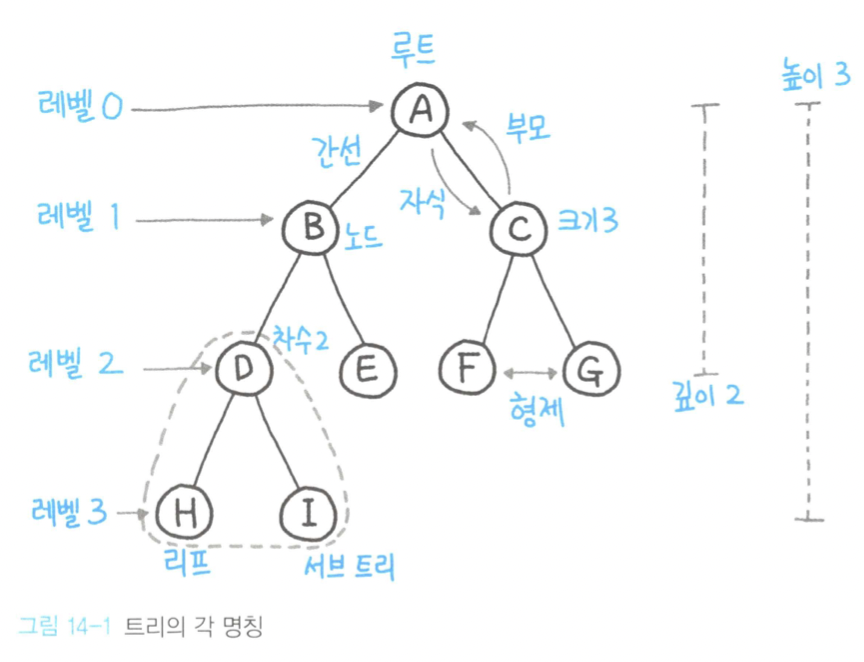

### 그래프 vs 트리

 그래프와 트리의 차이점은 무엇일까? "트리는 순환 구조를 갖지 않는 그래프입니다."

 핵심은 순호나 구조 Cyclic 가 아니라는 데 있습니다. 트리는 특수한 형태의 그래프의 일종이며, 크게 그래프의 범주에 포함됩니다.

 하지만 트리는 그래프와 달리 어떠한 경우에도 한번 연결된 노드가 다시 연결 되는 법이 없습니다.

 이외엥도 단방향 Uni-Directional, 양방향 Bi-Directional 을 모두 가리킬 수 있는 그래프와 달리, 트리는 부모 노드에서 자식 노드를 가리키는 단방향 뿐입니다.

 그 뿐만 아니라 트리는 하나의 부모 노드를 갖는다는 차이점이 있으며 루트 또한 하나여야 합니다. 이처럼 트리와 그래프는 서로 다른 점이 많습니다.

 - 트리가 아닌 예
 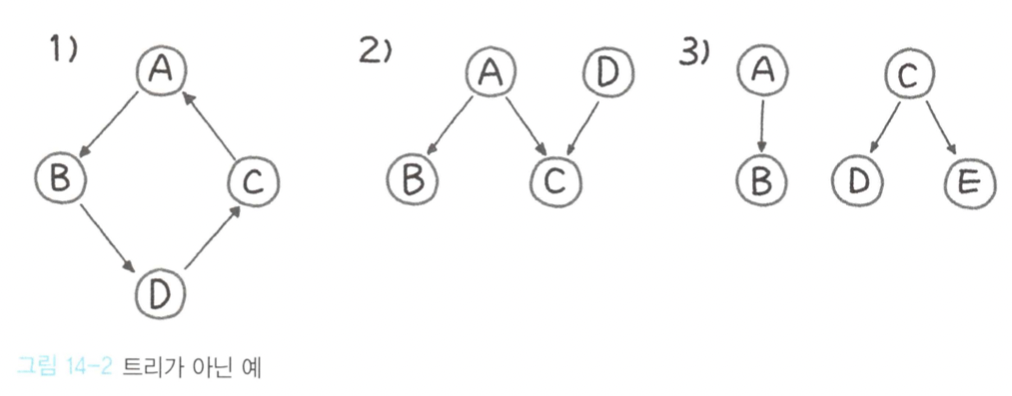

1) 순환 구조이기 떄문에, 앞서 그래프와 트리의 차이점에서 첫 번째로 언급한, 트리는 순환 구조를 갖지 않아야 합다는 정의에 부합하지 않습니다.

2) C 노드의 부모가 A, D 이렇게 둘이다. 부모 노드는 단 하나여야 한다.

3)  A->B 와 D <- C -> E 가 서로 연결 되어 있지 않으며, 루트가 둘이므로 트리가 아니다. 루트 또한 하나여야 한다.

### 이진 트리

트리 자료 구조는 이진 트리와 이진 탐색 트리 (Binary Search Tree 이하 BST)입니다.

각 노드가 m개 이하의 자식을 갖고 있으면, m-ary 트리 (다항 트리, 다진 트리)라고 합니다.

m = 2일 경우, 즉 모든 노드의 차수가 2 이하일 때는 특별이 이진 트리 (Binary Tree) 라고 구분해서 부릅니다.

이진 트리는 왼쪽, 오른쪽 최대 2개의 자식을 갖는 매우 단순한 형태로, 다지느 트리에 비해 훨씬 간결할 뿐만 아니라 여러 가지 알고리즘을 구현하는 일도 좀 더 간단하게 처리 할 수 있어서, 대체로 트리라고 하면 특별한 경우가 아니고선 대부분 이진 트리를 일컫는다.

- 이진 트리의 유형

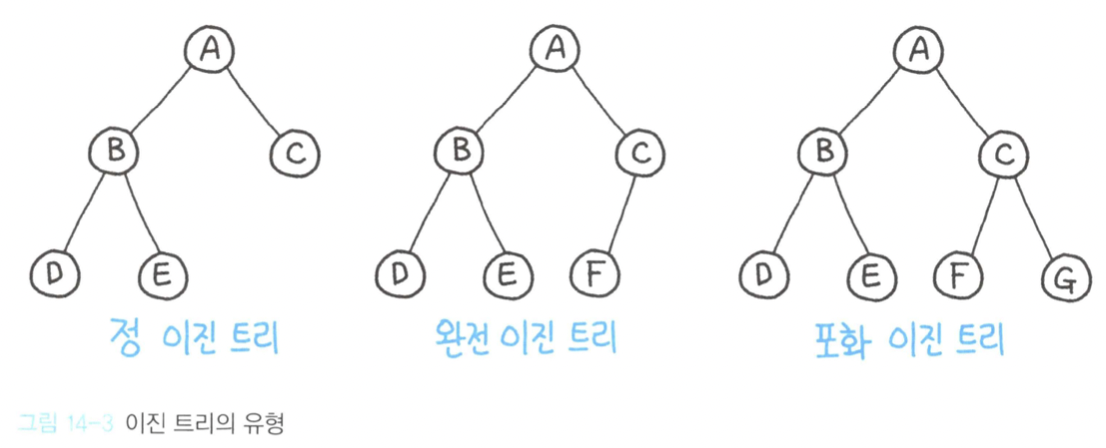

정 이진 트리 Full Binary Tree : 모든 노드가 0개 또는 2개의 자식 노드를 갖는다.

완전 이진 트리 Complete Binary Tree : 마지막 레벨을 제외하고 모든 레벨이 완전히 채워져 있으며, 마지막 레벨의 모든 노드는 가장 왼쪽부터 채워져 있다.

포화 이진 트리 Perfect Binary Tree : 모든 노드가 2개의 자식 노드를 갖고 있으며, 모든 리프 노드가 동일한 깊이 또는 레벨을 갖는댜 문자 그대로, 가장 완벽한 Perfect 유형의 트리다.


### 42. 이진 트리의 최대 깊이

이진 트리의 최대 깊이를 구하라.

[3, 9, 20, null, null, 15, 7] 가 주어졌을 때, 깊이는 3이다.

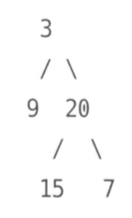

### 풀이 1. 반복 구조로 BFS 풀이

깊이 Depth는 어떻게 측정할 수 있을까?

BFS(너비 우선 탐색)로 풀이로 진행해보도록 하겠습니다.

BFS는 재귀가 아닌 반복 구조로 풀이로 진행할 수 있습니다.

일반적으로, DFS는 스택, BFS는 큐를 사용하여 구현한다.

In [ ]:
import collections
from collections import deque


class TreeNode:
    def __init__(self, val, left = None, right = None):
        self.val = val
        self.left = None
        self.right = None


class Solution:
    def maxDepth(self, root):
        if root is None:
            return 0
        queue = collections.deque([root])
        depth = 0

        while queue:
            depth += 1
            # 큐 연산 추출 노드의 자식 노드 삽입
            for _ in range(len(queue)):
                cur_root = queue.popleft()
                if cur_root.left:
                    queue.append(cur_root.left)
                if cur_root.right:
                    queue.append(cur_root.right)
        # BFS 반복 횟수 == 깊이
        return depth

In [ ]:
null = "null"

root = [3, 9, 20, null, null, 15, 7]

### 43. 이진 트리의 직경

이진 트리에서 두 노드 간 가장 긴 경로의 길이를 출력하라.

이진트리가 주어졌을 때, 

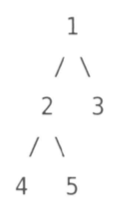

가장 긴 경로는 4 -> 2 -> 1 -> 3 또는 5 -> 2 -> 1 -> 3 으로 3이다.

### 풀이 1. 상태값 누적 트리 DFS

가장 긴 경로를 찾는 방법은 먼저 가장 말단, 즉 리프 노드까지 탐색한 다음 부모로 거슬러 올라가면서 각각의 거리를 계산해 상태 값을 업데이트 하면서 다음과 같이 누적해 나가면 됩니다.

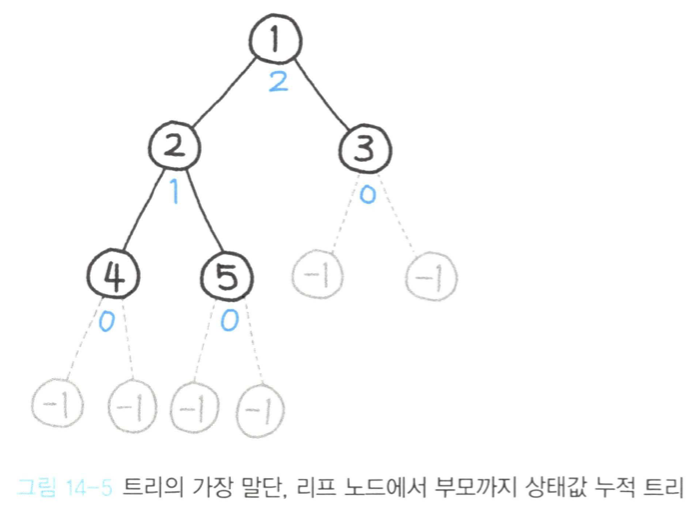

위 그림에서 존재하는 노드에도 -1이라는 값을 부여합니다. 나중에 보면 알겠지만, 정 이진 트리 Full Binary Tree 가 아닌 대부분의 경우엔느 존재하지 않는 자식 노드에 -1을 부여해 패널티를 주기 위함입니다.

이렇게 거슬러 올라가 최종 루트에서 상태값은 2, 거리는 3이 됩니다. 그러므로 정답은 거리인 3입니다.

상태값이란 리프 노드에서 현재 노드까지의 거리입니다.

거리는 왼쪽 자식 노드의 상태값과 오른쪽 자식 노드의 상태값의 합에 2를 더한 값입니다.

다시 정리하자면, 최종적으로 거리는 왼쪽 자식 노드의 리프 노드에서 현재 노드까지의 거리 (상태값)와,

오른쪽 자식 노드의 리프 노드에서 현재 노드까지의 거리(상태값)와, 오른쪽 자식 노드의 리프 노드에서 현재 노드까지의 거리 (상태값)의 합에 2 (현재 노드와 왼쪽, 오른쪽 자식 노드와의 거리)를 더한 값과 같습니다.

In [ ]:
class Solution:
    longest: int = 0

    def diameterOfBinaryTree(self, root: TreeNode) -> int:
        def dfs(node: TreeNode) -> int: # 재귀 호출을 통해 왼쪽, 오른쪽의 각 리프 노드까지 DFS로 탐색을 합니다.
            if not node:
                return -1 # 자식 노드가 하나도 없는 경우 -> 거리 = 0, 상태값 = 0
            # 왼쪽, 오른쪽 각각 리프 노드까지 탐색
            left = dfs(node.left)
            right = dfs(node.right)

            # 가장 긴 경로
            self.longest = max(self.longest, left + right + 2)
            # 상태값
            return max(left, right) + 1

        dfs(root)
        return self.longest

logest 변수를 함수 내에 선언하지 않고 바깥에 클래스 변수로 선언해 번거롭지 self.longest 형태로 사용한 이유?

중첩 함수는 부모함수의 변수를 자유롭게 읽어들리 수 있습니다.

하지만 중첩함수에서 부모 함수의 변수를 재할당하게 되면, 참조 ID가 변경되어 별도의 로컬 변수로 선언된다고 합니다.

### 44. 가장 긴 동일 값의 경로

동일한 값을 지닌 가장 긴 경로를 찾아라.

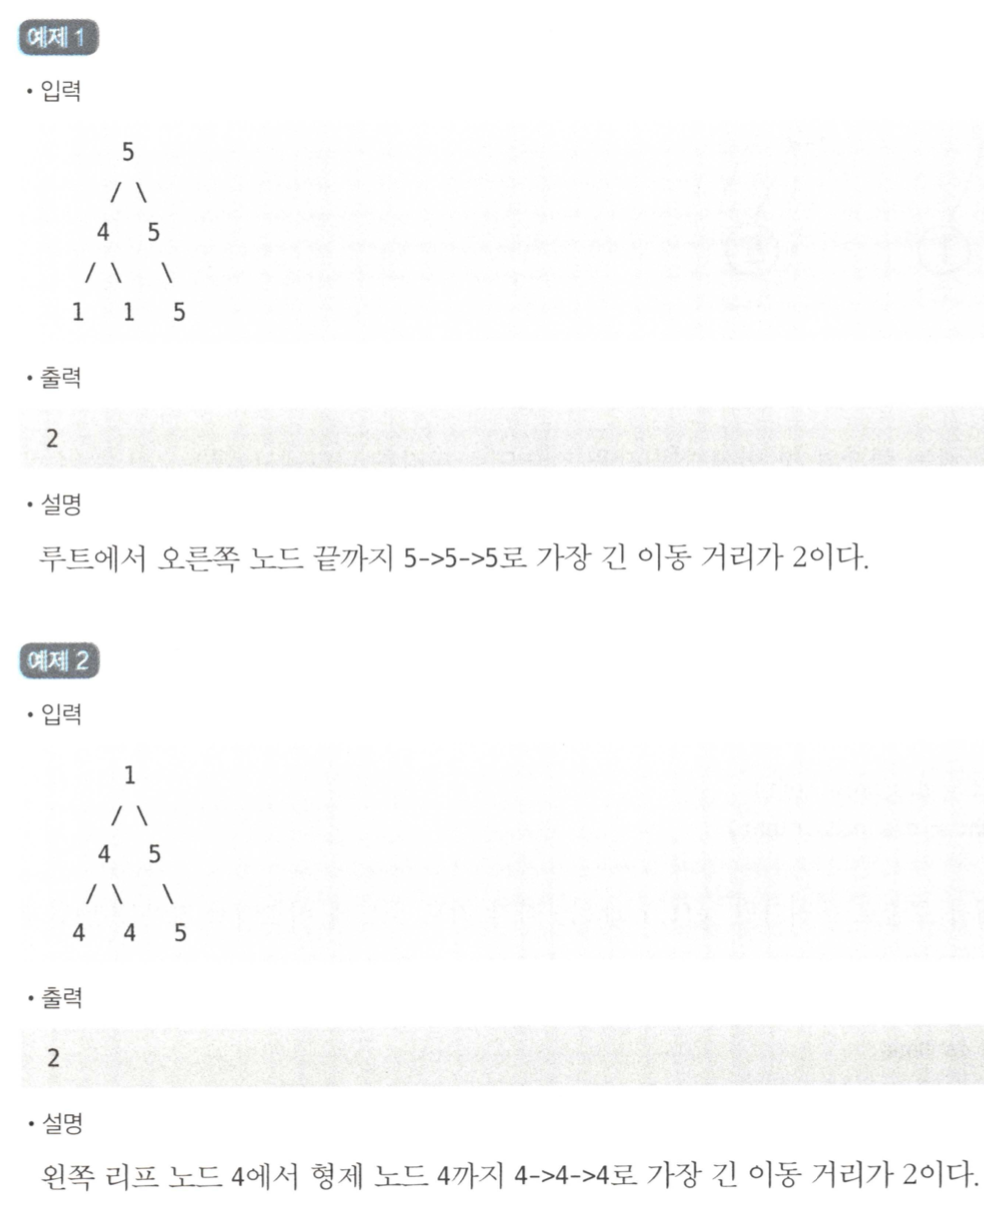

풀이 1.상태값 거리 계산 DFS

트리의 말단, 리프 노드까지 DFS로 탐색해 내려간 다음, 값이 일치할 경우 다음과 같이 거리를 차곡차곡 쌓아 올려가며 백트래킹하는 형태로 풀이할 수 있습니다.

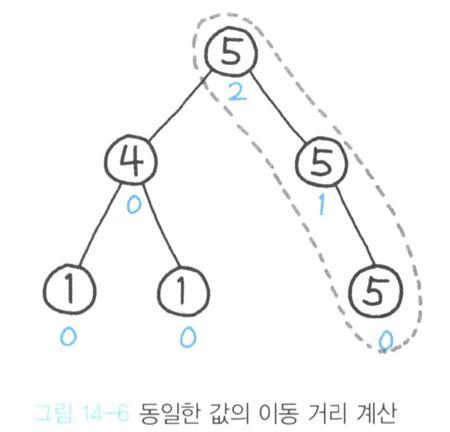

위의 그림에서는 예제 첫 번째 입력값을 기준으로 트리를 나타내고, 루트 노드부터 우측 리프 노드까지 이동거리를 구하는 과정으로 표현을 했습니다.

이 경우 루트 노드에서부터 DFS로 재귀 탐색을 진행하면서 리프에 도달하면 그때부터 백트래킹을 하면서 거리를 누적해 나가는 방식으로 진행했습니다.

In [ ]:
class Solution:
    result: int = 0

    def longestUnivaluePath(self, root: TreeNode) -> int:
        def dfs(node: TreeNode):
            if node is None:
                return 0

            # 존재하지 않는 노드까지 DFS 재귀 탐색
            left = dfs(node.left)
            right = dfs(node.right)

            # 현재 노드가 자식 노드와 동일한 경우 거리 1 증가
            if node.left and node.left.val == node.val: # 이 문제는 동일값 여부를 판별해 거리를 계산하는 문제이기 때문에, 자식 노드가 동일한 값인지 확인해주는 과정이 필요.
                left += 1 # 왼쪽과 오른쪽 자식 노드를 각각 확인해서 현재 노드, 그러니깐 부모 노드와 동일한 경우 거리를 1 증가합니다.
            else:
                left = 0
            if node.right and node.right.val == node.val:
                right += 1
            else:
                right = 0

            # 왼쪽, 오른쪽 자식 노드간 거리의 합 최대값이 결과
            self.result = max(self.result, left + right)
            # 자식 노드 상태값 중 큰 값 리턴
            return max(left, right)

        dfs(root)
        return self.result

### 45. 이진 트리 반전

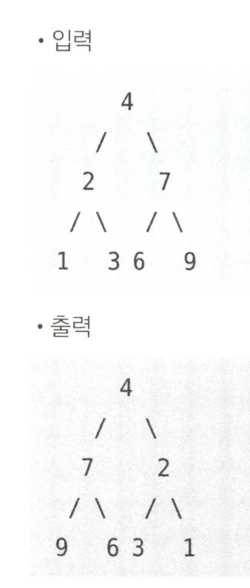

### 풀이 1. 파이썬 다운 방식



In [ ]:
class Solution:
    def invertTree(self, root: TreeNode) -> TreeNode:
        if root:
            root.left, root.right = \
                self.invertTree(root.right), self.invertTree(root.left)
            return root
        return None

### 풀이 2. 반복 구조로 BFS

먼저 삽입된 노드는 반복 구조로 계속 스왑되면서 자식 노드가 계속해서 큐에 추가되는 구조로, 왼쪽과 오른쪽에 있는 노드를 스왑하면서 queue에 추가해줍니다.

In [ ]:
import collections

class Solution:
    def invertTree(self, root: TreeNode) -> TreeNode:
        queue = collections.deque([root])

        while queue:
            node = queue.popleft()
            # 부모 노드 부터 하향식 스왑 (Top-Down 방식 풀이)
            if node:
                node.left, node.right = node.right, node.left

                queue.append(node.left)
                queue.append(node.right)

        return root

### 반복 구조로 DFS

위의 BFS에서는 popleft()로 처음값을 추출 했었지만,

이번 DFS에서는 pop()으로 마지막 값을 추출해줍니다.

In [ ]:
class Solution:
    def invertTree(self, root: TreeNode) -> TreeNode:
        stack = collections.deque([root])

        while stack:
            node = stack.pop()
            # 부모 노드 부터 하향식 스왑
            if node:
                node.left, node.right = node.right, node.left

                stack.append(node.left)
                stack.append(node.right)

        return root

### 4. 반복 구조로 DFS 후위 순회

앞선 풀이는 전위 (Pre-Order) 순회 형태로 처리 했지만, 다음과 같이 후위 (Post-Order) 순회로 변경해도 풀이가 가능합니다.

In [ ]:
class Solution:
    def invertTree(self, root: TreeNode) -> TreeNode:
        stack = collections.deque([root])

        while stack:
            node = stack.pop()

            if node:
                stack.append(node.left)
                stack.append(node.right)

                node.left, node.right = node.right, node.left  # 후위 순회

        return root

### 46. 두 이진 트리 병합

두 이진 트리를 병합하라. 중복 되는 노드는 값을 합산한다.

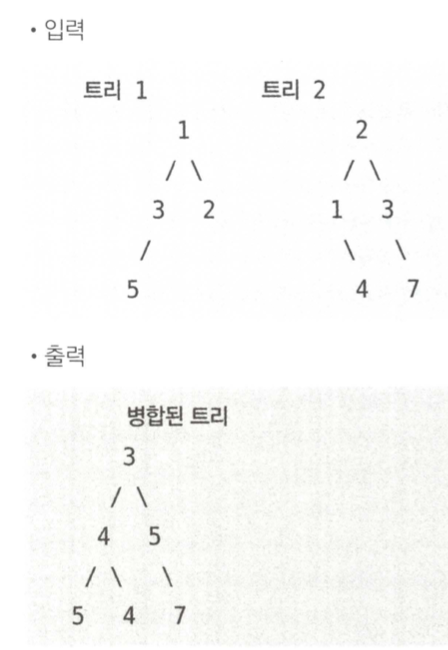

### 풀이 1. 재귀 탐색

각각 이진 트리의 루트부터 시작해서 합쳐 나가면서 좌, 우 자식 노드 또합 병합될 수 있도록 각 트리 자식 노드를 재귀 호출해줍니다.

만약 어느 한쪽에 노드가 존재하지 않는다면 (not (t1 and t2)) 존재하는 노드만 리턴하고 더 이상 재귀호출을 진행하지 않습니다.

만약 양쪽 노드가 모두 존재하지 않는다면 None이 리턴 될 것입니다.

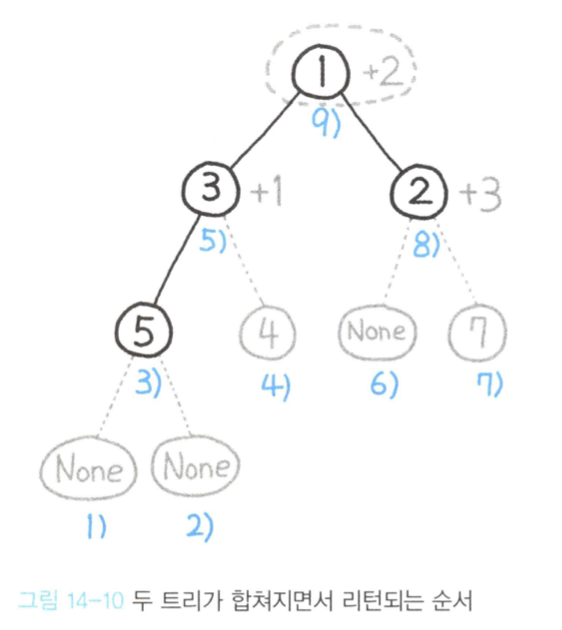

위 그림을 보면 양쪽 노드가 모두 존재하지 않아 None이 리턴 되는 경우를 비록한 모든 탐색의 경우를 볼 수 있습니다.

탐색 순서는 파란 글씨로 숫자를 따라가면 되는 데, 순서는 리턴으로 백트래킹이 되는 순서를 기준으로 했습니다.

가장 말단인 1번 부터 리턴 값을 차례대로 받아오며, 9번에서 모든 리턴이 마무리 되고 병합된 최종 결과가 남게 되면서 탐색이 종료됩니다.

리턴 순서만 놓고 본다면 탐색 순서는는 후위 순회 (Post-Order)임을 확인할 수 있습니다.

In [ ]:
class Solution:
    def mergeTrees(self, t1: TreeNode, t2: TreeNode) -> TreeNode:
        if t1 and t2:
            node = TreeNode(t1.val + t2.val)
            node.left = self.mergeTrees(t1.left, t2.left)
            node.right = self.mergeTrees(t1.right, t2.right)

            return node
        else:
            return t1 or t2

### 47. 이진 트리 직렬화 & 역직렬화

이진 트리를 배열로 직렬화하고, 반대로 역직렬화하는 기능을 구현하라.

즉, 다음과 같은 트리는 [1, 2, 3, null, null, 4, 5] 형태로 직렬화 할 수 있을 것이다.

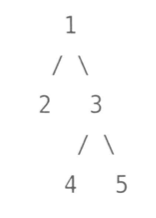

### 풀이 1. 직렬화 & 역직렬화 구현

> 직렬화를 제대로 구현하기 위해서는 우선 이진 트리의 특징과 표현에 대해서 정확히 알아야 합니다.
> 
> '이진 트리' 데이터 구조는 논리적인 구조입니다.
>
> 이를 파일이나 디스크에 저장하기 위해서는 물리적인 형태로 바꿔줘야하는데, 이를 직렬화 (Serilaize) 라고 합니다.
>
> 그 반대는 역직렬화 (Deserialize) 입니다.
> 
> 파이썬에서는 pickle이라는 직렬화 모듈을 기본으로 제공합니다.
> 
> 이 모듈의 이름으로 인해 파이썬 객체의 계층 Hierachy 구조를 바이트 스크림 ByteStream 으로 변경하는 작업은 피클링 (Pickling) 이라고도 합니다.
>
> 이 외에도 마샬링 (Marshalling), 플래트닝 (Flattening) 등으로 표현하기도 합니다.

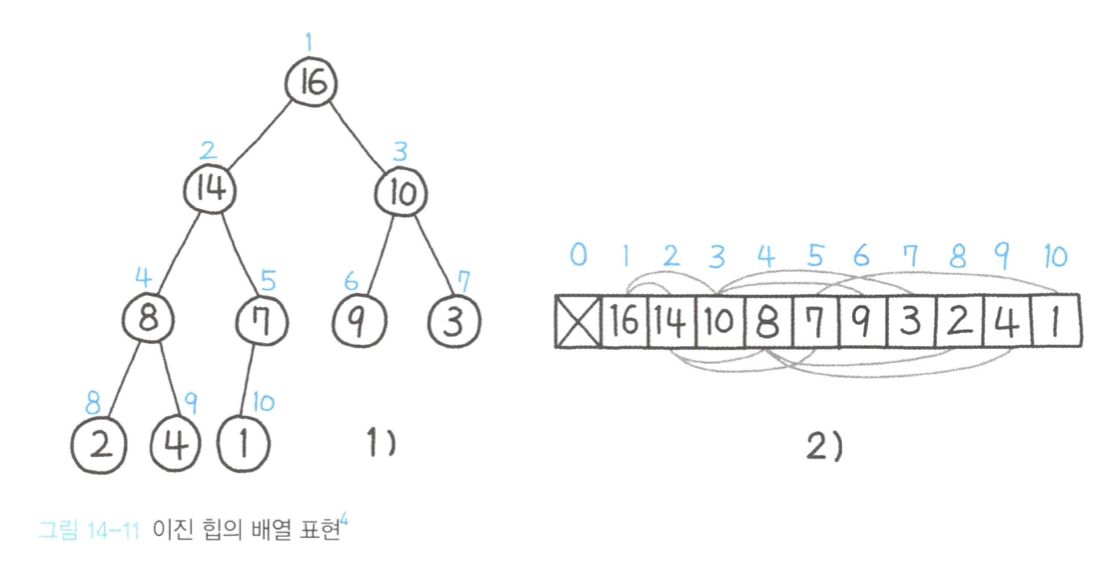

위 내용 요약!

1. 직렬화 : 이진트리 -> 문자열
2. 역직렬화 : 문자열 -> 원래의 트리구조

문제로 준 이진 트리를 직렬화를 통해서 [1, 2, 3, null, null, 4, 5] 로 만들어보고,
반대로 문자열을 역직렬화를 통해서 원래의 트리구조화 할 예정입니다.

위 그림과 같이 이진 힙을 배열로 표현하는 경우를 살펴봅시다.

그림에서 파란 글씨는 인덱스를 의미합니다.

위 그림의 1) 이진 힙은 완전 이진 트리 (Complete Binary)로서, 배열로 표현하기 매우 좋은 구조입니다.

높이 순서대로 순회하면 모든 노드를 배열로 낭비 없이 배치할 수 있기 때문입니다.

위 그림의 2) 처럼 완전 이진 트리는 배열에 빈틈없이 배치가 가능하며, 대개 트리의 배열 표현의 경우 계산을 편하게 하기 위해 인덱스는 1부터 사용합니다.


해당 노드의 인덱스를 알면 깊이가 얼마인지, 부모와 자식 노드가 배열 어디에 위치하는 지 바로 알 수 있습니다.

### 직렬화

직렬화 알고리즘에는 제약이 없으므로, BFS로 구현하든 DFS로 구현하든 아무런 상관이 없습니다.

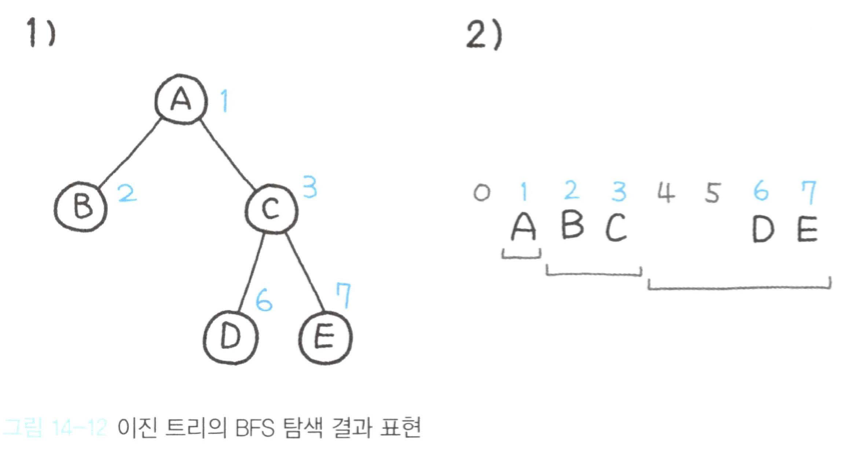

위 그림을 BFS 탐색 결과로 표현하면, 배열만 봐도 트리의 형태를 떠올리 수 있도록 쉽게 구현해봅시다.

이진 트리를 BFS로 표현하면 순서대로 배치 되기 떄문에, DFS 에 비해 매우 직관적으로 알아볼 수 있습니다.

바로 우측 2)번 그림에서 제시한 배열과 동일한 형태가 됩니다.

여기에서 파란 글씨는 인덱스이며, 회색 글씨는 비어 있는 인덱스를 의미합니다.

1)번 그림에서 트리의 비어 있는 노드들은 마찬가지로 2)번 그림의 배열에서도 공간을 비워 두었는데 여기서는 Null 대신 코드에서는 #으로 표현학기로 합니다.

그러면 직렬화 결과 [#, A, B, C, #, #, D, E]이 될 것이라는 것을 이해할 수 있습니다.

In [ ]:
class TreeNode:
    def __init__(self, val, left = None, right = None):
        self.val = val
        self.left = None
        self.right = None

class Codec:
    # 직렬화 -> 논리적인 구조로 되어 있는 이진 트리를 배열 (물리적인 구조로)로 return
    def serialize(self, root: TreeNode) -> str:
        queue = collections.deque([root])
        result = ['#'] # 인덱스 계산을 쉽게 하기 위해 #으로 채우고 인덱스는 1부터 시작합니다.
        # 트리 BFS 직렬화
        while queue:
            node = queue.popleft()
            if node: # node 가 None이 아닌 경우,
                queue.append(node.left)
                queue.append(node.right)

                result.append(str(node.val)) # 현재 노드의 값을 추가해줍니다. -> 큐에는 BFS 탐색 결과가 계속 추가 되면서 마지막 노드까지 차례대로 배열로 표현될 것입니다.
            else: # node 가 None 인 경우 
                result.append('#') # 노드가 존재하지 않을 경우, Null을 의미하는 #을 추가해줍니다.
        return ' '.join(result) # BFS 탐색이 끝나면 해달 배열을 공백을 기준으로 문자열로 변환하여 return 해줍니다. [# 1, 2, 3, null, null, 4, 5]

    # 역직렬화 -> 배열로 되어 있는 이진트리를 우너래의 논리적인 구조로 return
    def deserialize(self, data: str) -> TreeNode:
        # 예외 처리
        if data == '# #':
            return None

        nodes = data.split() # 공백 단위로 문자열을 끊어주어서 nodes라는 리스트 변수로 만들어줍니다.

        root = TreeNode(int(nodes[1])) # 트리로 만들어줄 노드 변수 root 세팅
        queue, index = collections.deque([root]), 2 # 처음 시작 인덱스 1, 다음 노드는 인덱스 2
        # 빠른 런너처럼 자식 노드 결과 먼저 확인 후 큐 삽입
        while queue:
            node = queue.popleft()
            if nodes[index] is not '#': # 왼쪽 노드 값이 존재할 경우
                node.left = TreeNode(int(nodes[index])) # 왼쪽 자식은 별도의 인덱스를 부여 받아 다음과 같이 nodes를 먼저 탐색해 나갑니다.
                queue.append(node.left)
            index += 1 # 왼쪽 다음 오른쪽 노드로 이동

            if nodes[index] is not '#': # 오른쪽 노드가 존재할 경우
                node.right = TreeNode(int(nodes[index]))
                queue.append(node.right) # 오른쪽 다음 왼쪽 노드로 이동
            index += 1
        return root

In [ ]:
n1 = TreeNode(1)
n2 = TreeNode(2)
n3 = TreeNode(3)
n4 = TreeNode(null)
n5 = TreeNode(null)
n6 = TreeNode(4)
n7 = TreeNode(5)

n1.left = n2
n1.right = n3
n2.left = n4
n2.right = n5
n3.left = n6
n3.right = n7

In [ ]:
Codec

__main__.Codec

In [ ]:
Codec.serialize(None, n1)

'# 1 2 3 null null 4 5 # # # # # # # #'

In [ ]:
class TreeNode:
    def __init__(self, val = None, left = None, right = None):
        self.val = val
        self.left = None
        self.right = None

class Codec:
    # 역직렬화 -> 배열로 되어 있는 이진트리를 원래의 논리적인 구조로 return
    def deserialize(self, data: str) -> TreeNode:
        # 예외 처리
        if data == '# #':
            return None

        nodes = data.split() # 공백 단위로 문자열을 끊어주어서 nodes라는 리스트 변수로 만들어줍니다.

        root = TreeNode(int(nodes[1])) # 트리로 만들어줄 노드 변수 root 세팅
        queue, index = collections.deque([root]), 2 # 처음 시작 인덱스 1, 다음 노드는 인덱스 2
        # 빠른 런너처럼 자식 노드 결과 먼저 확인 후 큐 삽입
        while queue:
            node = queue.popleft()
            if nodes[index] is not '#': # 왼쪽 노드 값이 존재할 경우
                node.left = TreeNode(int(nodes[index])) # 왼쪽 자식은 별도의 인덱스를 부여 받아 다음과 같이 nodes를 먼저 탐색해 나갑니다.
                queue.append(node.left)
            index += 1 # 왼쪽 다음 오른쪽 노드로 이동

            if nodes[index] is not '#': # 오른쪽 노드가 존재할 경우
                node.right = TreeNode(int(nodes[index]))
                queue.append(node.right) # 오른쪽 다음 왼쪽 노드로 이동
            index += 1
        return root
        
n1 = TreeNode(1)
n2 = TreeNode(2)
n3 = TreeNode(3)
n4 = TreeNode(null)
n5 = TreeNode(null)
n6 = TreeNode(4)
n7 = TreeNode(5)

n1.left = n2
n1.right = n3
n2.left = n4
n2.right = n5
n3.left = n6
n3.right = n7

Codec.deserialize(None, n1)

### 48. 균형 이진 트리

이진 트리가 높이 균형 Height Balanced 인지 판단하라.

높이 균형은 모든 노드의 서브 트리 간의 높이 차이가 1 이하인 것을 말합니다.

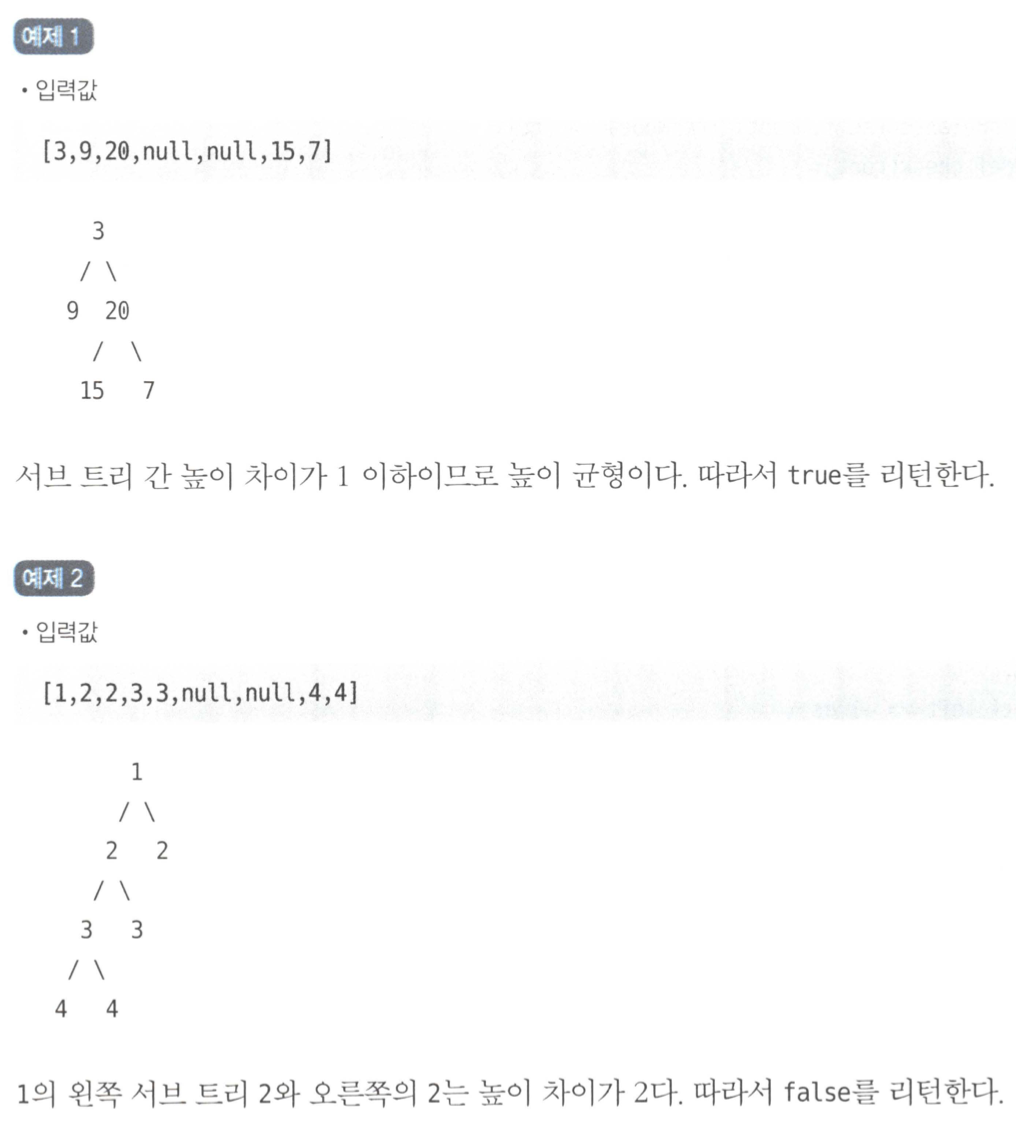

### 풀이 1. 재귀 구조로 높이 차이 계산

높이 균형이 중요한 개념인 이유는, 균형이 맞아야 효율적으로 트리를 구성할 수 있으며, 탐색 또한 훨씬 더 효율적으로 처리할 수 있기 때문입니다.

In [ ]:
class Solution:
    def isBalanced(self, root: TreeNode) -> bool: # 재귀 호출로 리프 노드까지 내려갑니다.
        def check(root):
            if not root:
                return 0 # 이후 맨 마지막 노드에 이르면 각각 left = 0, right = 0을 리턴하도록 구성합니다.

            left = check(root.left)
            right = check(root.right)
            # 높이 차이가 나는 경우 -1, 이외에는 높이에 따라 1 증가
            if left == -1 or \
                    right == -1 or \
                    abs(left - right) > 1:
                return -1
            return max(left, right) + 1 # left, right 가 모두 0 이라면 차이가 1보다 크지 않으므로 1을 리턴할 수 있도록 하며, 점점 1씩 증가하는 형태로 리턴합니다.

        return check(root) != -1

### 49. 최소 높이 트리

노드 개수와 무방향 그래프를 입력 받아 트리가 최소 높이가 되는 루트의 목록을 리턴합니다.

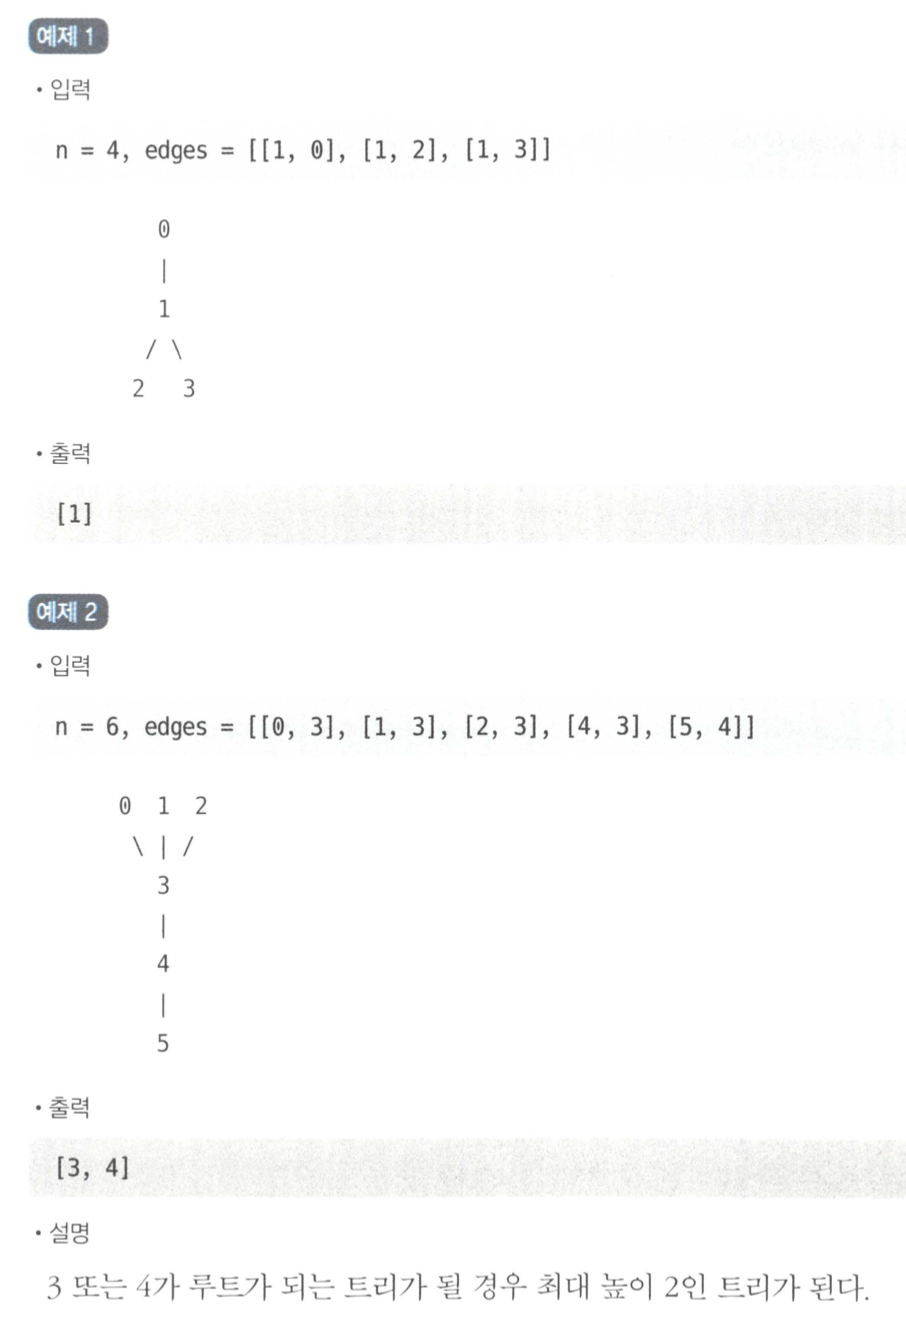

### 풀이 1. 단계별 리프 노드 제거

최소 높이를 구성하려면 가장 가운데에 있는 값이 루트여야 합니다.

이 말은 리프 노드를 하나씩 제거해 나가면서 남아 있는 값을 찾으면 이 값이 가장 가운데에 있는 값이 될 것이고, 이 값을 루트로 했을 때 최소 높이를 구성할 수 있다는 뜻이기도 합니다.

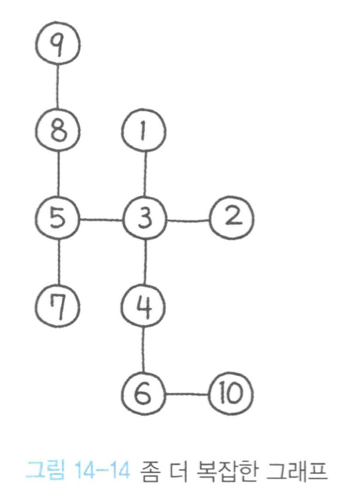

[[1, 3], [2, 3], [3, 4], [3, 5], [4, 6], [6, 10], [5, 7], [5, 8], [8, 9]]정도로 해서 좀 더 복잡한 그래프를 다음과 같이 구성하면 위의 그래프가 나옵니다.

여기에서 리프 노드를 제거해 보면,

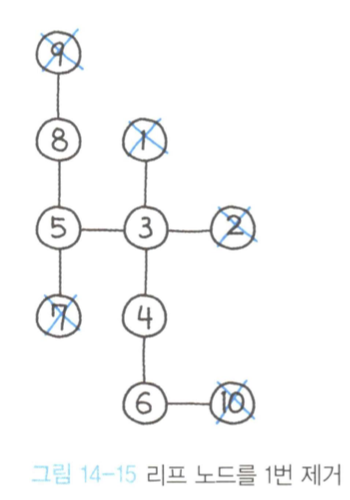

위의 그래프가 나오는데, 추가 작업이 필요할 것으로 보입니다.

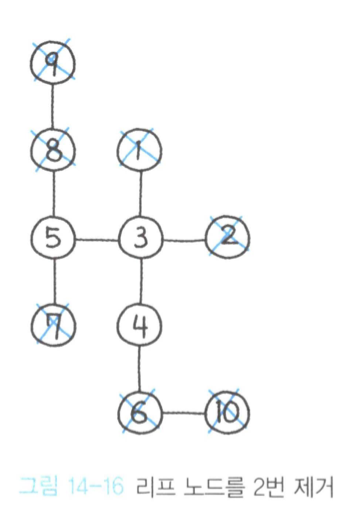

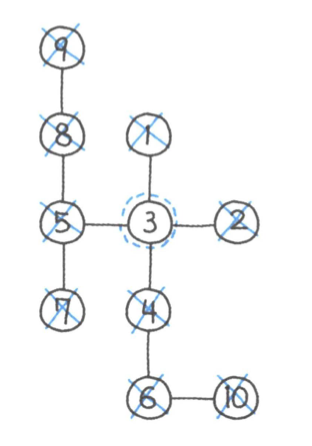

최종 결과 3이 나왔으며, 3을 루트로 했을 때 최소 높이 트리를 구성할 수 있습니다.

이 과정을 코드로 구현해보면 아래와 같습니다.

In [ ]:
import collections
from typing import List


class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        if n <= 1:
            return [0]

        # 양방향 그래프 구성
        graph = collections.defaultdict(list)
        for i, j in edges:
            graph[i].append(j)
            graph[j].append(i)

        # 첫 번째 리프 노드 추가
        leaves = []
        for i in range(n + 1):
            if len(graph[i]) == 1:
                leaves.append(i)

        # 루트 노드만 남을 때까지 반복 제거
        while n > 2:
            n -= len(leaves)
            new_leaves = []
            for leaf in leaves:
                neighbor = graph[leaf].pop()
                graph[neighbor].remove(leaf)

                if len(graph[neighbor]) == 1:
                    new_leaves.append(neighbor)

            leaves = new_leaves

        return leaves